# Behaviorial Cloning Project

## About this project

This project is a part of Udacity Self Driving Car Engineer Nanodegree course. The main goal of the the project is to make use of deep neural networks and convolutional neural networks (CNN) to clone driving behavior. The network has to be trained, validated and tested using neural network framework Keras. The model should output the steering angle which will guide the car to autonomous drive around the test tracks provided in the project. 

Simulator is provided where we can steer a car around a track for data collection. The simulator includes both training and autonomous modes, and two tracks on which the car can be driven. We will use image data and steering angles to train CNN and then use this model to drive the car autonomously around the track.

In training mode, user generated driving data is generated in the form of simulated car camera images (center, left and right camera) and control data (steering angle, throttle, brake, speed). Using the Keras deep learning framework, a convolutional neural network (CNN) model is produced using the collected driving data (see model.py) and saved as as model.h5.

Using the saved model from model.h5, drive.py provided can be modified to preprocess the image data and starting up a local server to control the simulator in autonomous mode. The command to run the server is python drive.py model.h5.

The most challenging part in this project is not only to develop a CNN model network which is able to drive the car around the track without going beyond the boundary of the road and on the sides, but also feeding and processing the training data to the CNN in a way that allows the model to generalize well enough to drive in an environment it has not encountered yet. 

## Data Set Summary & Exploration

I used the dataset provided by the Udacity for this project. The data can be downloaded from here
http://video.udacity-data.com.s3.amazonaws.com/topher/2016/December/584f6edd_data/data.zip

In [2]:
# Load pickled data
import pickle
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Read the Driving Log data provided by Udacity
df = pd.read_csv('data/driving_log.csv')

samples = len(df.index)
print("Number of samples/images =", samples)

Number of samples/images = 8036


In [3]:
cols = list(df.columns.values)
print("Order in which different type of values contained in dataset", cols)

Order in which different type of values contained in dataset ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']


I used the pandas and numpy library to calculate summary statistics of the data set:
There are about 8036 images. The dataset contains jpg image files and have a shape of 160x320x3.

In [4]:
image = mpimg.imread('data/' + df[cols[0]][0].split(' ')[-1])
print("Shape of the image ", image.shape)

Shape of the image  (160, 320, 3)


In [162]:
center_images = df[cols[0]]
left_images = df[cols[1]]
right_images = df[cols[2]]
steering_angles = df[cols[3]]

In [163]:
print(df[cols[0]][0].split(' ')[-1])

print(left_images[0].split(' ')[-1])

print(right_images[0].split(' ')[-1])

IMG/center_2016_12_01_13_30_48_287.jpg
IMG/left_2016_12_01_13_30_48_287.jpg
IMG/right_2016_12_01_13_30_48_287.jpg


Following are the three different camera images from the dataset:

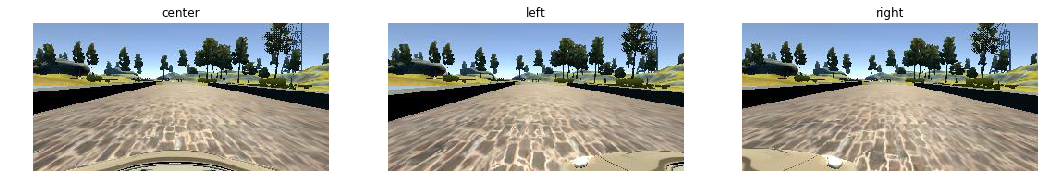

In [5]:
# Plot the images with center, left and right view
plt.figure(figsize=(18,18))
for i in range(3):
    image = mpimg.imread('data/' + df[cols[i]][0].split(' ')[-1])
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(cols[i])
plt.show()

The below chart shows the different steering angles and number of anlge values in the dataset per steering angle.

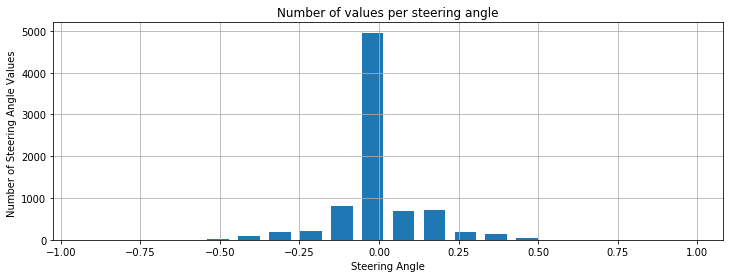

In [9]:
angles = df['steering']
num_bins = 20
avg_samples_per_bin = len(angles)/num_bins
hist, bins = np.histogram(angles, num_bins)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(12, 4))
plt.bar(center, hist, align='center', width=width)
plt.xlabel('Steering Angle')
plt.ylabel('Number of Steering Angle Values ')
plt.title('Number of values per steering angle')
plt.grid()
plt.show()

From the above chart we can observe that the data is biased towards the straight/center and left values. And most
of these values are close to 0. Since, this data is biased we can not rely on it to train our model. We need to do 
preprocessing to train our model correctly. 

## Model Architecture and Training Strategy

1. Model Architecture

I used NVIDIA architecture as my base model. http://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf

The model includes ELU layers to introduce nonlinearity and the data is normalized in the model using a Keras lambda layer.

2. Attempts to reduce overfitting in the model

The model contains dropout layers and L2 Regularization in order to reduce overfitting.

The model was trained and validated on different data sets to ensure that the model was not overfitting. The dataset samples were divided in ratio of 80 and 20 for training and validation. The model was tested by running it through the simulator and ensuring that the vehicle could stay on the track.

3. Model parameter tuning

The model used an adam optimizer, with the learning rate of 0.0001. 
Number of epochs: 50. 
Images generated per epoch: 20,000 plus images were generated on the fly using Keras' fit_generator method to train images generated by the generator.
Batch Size: 128

4. Appropriate training data

I used the Udacity provided data to train and validate the model. I used a combination of techniques to make sure the model learns properly to keep the car driving on the road and not to go on sides and bump out. 
For details about how I created the training data, see the next section.

1. Solution Design Approach

The project instructions suggest to start from a known model and provided a link to the nVidia model  - the diagram below shows the NVIDIA model.

As a first step I created the model as shown above in the picture - including image normalization using a Keras Lambda function, with three 5x5 convolution layers, two 3x3 convolution layers, and three fully-connected layers. The paper does not describe which activation functions to use and what strategies to use to avoid overfitting. So, I started with the RELU as activation function and with dropout between the layers as 0.5. I choose Adam optimizer with its default parameters and mean squared error (MSE) for loss function.


2. Final Model Architecture

The final model architecture consisted of a convolution neural network with the following layers, shape and parameters.

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
===================================================
lambda_1 (Lambda)                (None, 64, 64, 3)     0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 30, 30, 24)    1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 30, 30, 24)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 13, 13, 36)    21636       dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 13, 13, 36)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 5, 5, 48)      43248       dropout_2[0][0]                  
____________________________________________________________________________________________________
dropout_3 (Dropout)              (None, 5, 5, 48)      0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 3, 3, 64)      27712       dropout_3[0][0]                  
____________________________________________________________________________________________________
dropout_4 (Dropout)              (None, 3, 3, 64)      0           convolution2d_4[0][0]            
____________________________________________________________________________________________________
convolution2d_5 (Convolution2D)  (None, 1, 1, 64)      36928       dropout_4[0][0]                  
____________________________________________________________________________________________________
dropout_5 (Dropout)              (None, 1, 1, 64)      0           convolution2d_5[0][0]            
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 64)            0           dropout_5[0][0]                  
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1164)          75660       flatten_1[0][0]                  
____________________________________________________________________________________________________
dropout_6 (Dropout)              (None, 1164)          0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 100)           116500      dropout_6[0][0]                  
____________________________________________________________________________________________________
dropout_7 (Dropout)              (None, 100)           0           dense_2[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 50)            5050        dropout_7[0][0]                  
____________________________________________________________________________________________________
dropout_8 (Dropout)              (None, 50)            0           dense_3[0][0]                    
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 10)            510         dropout_8[0][0]                  
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 1)             11          dense_4[0][0]                    
===================================================
Total params: 329,079
Trainable params: 329,079
Non-trainable params: 0
____________________________________________________________________________________________________

2. Collecting Additional Driving Data
As a part of this project Udacity provided the sample data for the track 1. I first tried to generate my own data using the simulator but it was not helping in training the data as I read in the forums that generating data with keyboard was not so useful and generating the steering angle values appropriately. Instead Joystick should be used to generate data. Therefore, I finally choose not to generate my own data and use Udacity provided data which is sufficient to train the model. 

3. Creation of the Training Set & Training Process

In training mode, the simulator produces three images per frame recording with 3 different cameras mounted on center, left and right in the front side of the car. The simulator also produces a driving_log.csv file which contains the file path for each camera as well as information about the steering measurement, throttle, brake and speed of the vehicle.

For this project, recording recoveries from the sides of the road back to center is effective. But it is also possible to use all three camera images to train the model. My model loads the images from all the camera views for each frame and steering angle and does an adjustment of +0.25 to left camera image and -0.25 to the right camera image view. This way we feed the left and right camera images to the model as if they were coming from the center camera. This way, we teach the model how to steer if the car drifts off to the left or the right.

Images produced by the simulator in training mode are 160x320, and therefore require preprocessing prior to being fed to the CNN because it expects input images to be size 64x64 (the original input image size which nvidia model expects to be 66x200). To achieve this, the bottom 25 pixels and the top 50 pixels (although this number later changed) are cropped from the image and it is then resized to 64x64 at the end of PreProcess_Data function step. As NVIDIA paper suggested to convert images from RGB to YUV, I instead choose images to be converted into HSV format since the data augmentation or preprocessing pipeline I used was based on HSV color format. Because drive.py uses the same CNN model to predict steering angles in real time, it requires the same image preprocessing (Note, however: using cv2.imread, as model.py does, reads images in BGR, while images received by drive.py from the simulator are RGB, and thus require different color space conversion). This is achieved inside the method called PreProcess_Data in model.py and in drive.py we changed images from RGB2HSV, cropped them and then resized them to 64x64. 

To reduce the model's tendency to overfit to the conditions of the test track, images are augmented using different techniques before being fed to the CNN. 
Following are the augmentation techniques I applied on the training images
1. First augmentation consists of applyting random brightness adjustment implemented using function brightness_adjustment. This helps in simulating conditions for day and night.
2. Second augmentation consists of applying random horizon shift implemented using function shift_image. Using this we tried to simulate the effect of car being at different positions on the road, and adding an offset corresponding to the shift to the steering angle. The images were also shifted vertically by a random number to simulate the effect of driving up or down the slope.
3. Thirdly, I used shadow augmentation implemented using function random_shadow, where random shadows are cast across the image. This is implemented by choosing random points and shading all points on one side of the image. The function is called randomly during preprocessing.
4. Fourthly, I flipped the images randomly implemented using function flip_image, which flips the images and steering angle values which helps in simulating the data as if we are driving in the opposite direction. 

Out of the 8036 samples after randomly splitting them between training and validation samples in 80 & 20%.
Train Samples: 6428
Validation Samples: 1608

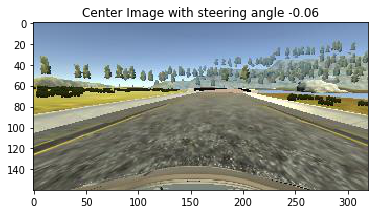

In [177]:
steering = df['steering'][100]
image = mpimg.imread('data/' + df[cols[0]][54].split(' ')[-1])
plt.imshow(image)
plt.title("Center Image with steering angle %.2f" % steering)
plt.show()

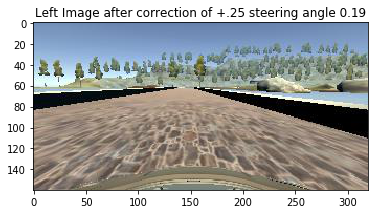

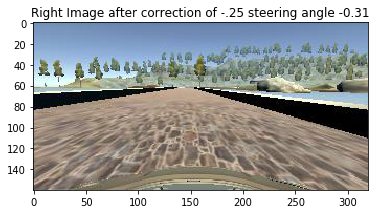

In [178]:
image = mpimg.imread('data/' + df[cols[0]][100].split(' ')[-1])
plt.imshow(image)
left_steering = float(steering) + .25
plt.title("Left Image after correction of +.25 steering angle %.2f" % left_steering)
plt.show()

image = mpimg.imread('data/' + df[cols[0]][100].split(' ')[-1])
plt.imshow(image)
right_steering = float(steering) - .25
plt.title("Right Image after correction of -.25 steering angle %.2f" % right_steering)
plt.show()

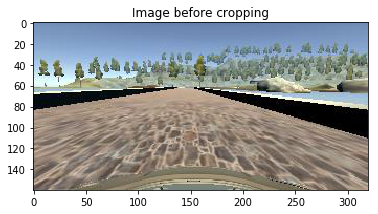

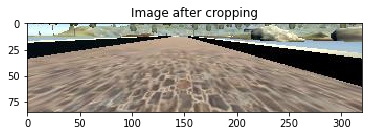

In [179]:
image = mpimg.imread('data/' + df[cols[0]][100].split(' ')[-1])
plt.imshow(image)
plt.title("Image before cropping")
plt.show()

image = image[50:(image.shape[0] - 25), 0:image.shape[1]]
plt.imshow(image)
plt.title("Image after cropping")
plt.show()

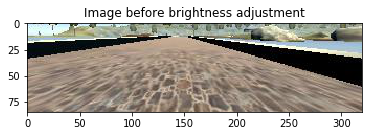

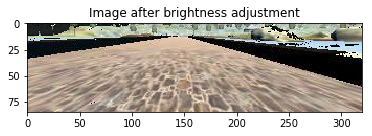

In [180]:
def brightness_adjustment(img, bval=None):
    # randomly generate the brightness reduction factor
    # Add a constant so that it prevents the image from being completely dark
    if bval:
        random_bright = bval
    else:
        random_bright = .25 + np.random.uniform()

    # Apply the brightness reduction to the V channel
    img[:, :, 2] = img[:, :, 2] * random_bright

    return img

image = cv2.imread('data/' + df[cols[0]][100].split(' ')[-1])
image = image[50:(image.shape[0] - 25), 0:image.shape[1]]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Image before brightness adjustment")
plt.show()

image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
image = brightness_adjustment(image)
image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
plt.imshow(image)
plt.title("Image after brightness adjustment")
plt.show()

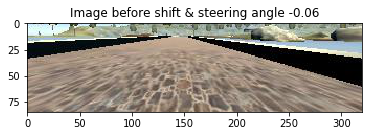

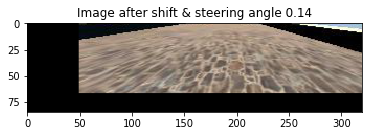

In [181]:
def shift_image(image, steer_ang, shift_range):
    # Translation
    rows, cols = image.shape[0:2]
    tr_x = shift_range * np.random.uniform() - shift_range / 2
    steer_ang = steer_ang + tr_x / shift_range * 2 * .2
    tr_y = 40 * np.random.uniform() - 40 / 2
    M = np.float32([[1, 0, tr_x], [0, 1, tr_y]])
    image_tr = cv2.warpAffine(image, M, (cols, rows))

    return image_tr, steer_ang

image = mpimg.imread('data/' + df[cols[0]][100].split(' ')[-1])
steering_angle = df['steering'][100]
image = image[50:(image.shape[0] - 25), 0:image.shape[1]]
plt.imshow(image)
plt.title("Image before shift & steering angle %.2f" % steering_angle)
plt.show()

image, steer_angle = shift_image(image, steering_angle, 100)
plt.imshow(image)
plt.title("Image after shift & steering angle %.2f" % steer_angle)
plt.show()

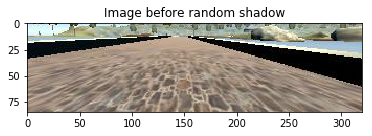

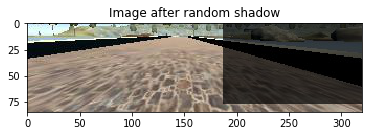

In [182]:
def random_shadow(image):

    shadow_factor = 0.3
    img_width = image.shape[1]
    img_height = image.shape[0]
    x = random.randint(0, img_width)
    y = random.randint(0, img_height)

    width = random.randint(int(img_width / 2), img_width)
    if (x + width > img_width):
        x = img_width - x

    height = random.randint(int(img_height / 2), img_height)
    if (y + height > img_height):
        y = img_height - y

    image[y:y + height, x:x + width, 2] = image[y:y + height, x:x + width, 2] * shadow_factor
    return image

image = cv2.imread('data/' + df[cols[0]][100].split(' ')[-1])
image = image[50:(image.shape[0] - 25), 0:image.shape[1]]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Image before random shadow")
plt.show()

image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
image = random_shadow(image)
image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
plt.imshow(image)
plt.title("Image after random shadow")
plt.show()

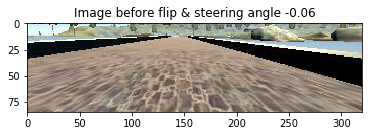

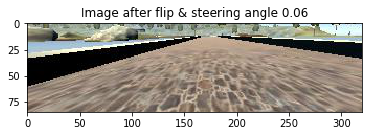

In [183]:
def flip_image(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -1 * steering_angle
    return image, steering_angle

image = mpimg.imread('data/' + df[cols[0]][100].split(' ')[-1])
steering_angle = df['steering'][100]
image = image[50:(image.shape[0] - 25), 0:image.shape[1]]
plt.imshow(image)
plt.title("Image before flip & steering angle %.2f" % steering_angle)
plt.show()

image, steer_angle = flip_image(image, steering_angle)
plt.imshow(image)
plt.title("Image after flip & steering angle %.2f" % steer_angle)
plt.show()

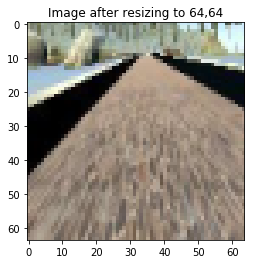

In [184]:
image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_AREA)
plt.imshow(image)
plt.title("Image after resizing to 64,64")
plt.show()

4. Training

I trained the model using the keras generator with batch size of 128 for total of 50 epochs. I used AWS EC2 GPUs g2.2xlarge instances to run this project because it was way faster than to train it on GPU on my PC. 

In each epoch, I generated around 20000 images. I trianed my model using epoch size of 10 and then saving it in model.h5 and then again running it. After 20 epochs, I was already getting the desired result where the model was able to drive the car autonomously and without drifting on to the sides. But I choose more epochs to train since I wanted to reduce the validation loss further and stopped @ 50 epochs. However, it took much time to arrive at the right architecture and training parameters. 
As on the way I did lot of silly mistakes where I forgot to add preprocessing step in drive.py because of which my car was always going out of the road. 